# FEATURE SELECTION AND EXTRACTION TECHNIQUES

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
  
* [Introduction](#0)
   * [What is Feature Selection?](#0.1)   
   * [Why Feature Selection?](#0.2) 
   * [Supervised Feature Selection Techniques](#0.3)
   * [Notebook Setup and Helper functions](#0.4)
   * [Load Dataset](#0.5)

* [Basic methods](#1)
   * [Remove constant features](#1.1)
   * [Remove quasi-constant features](#1.2)

* [Statistics Filter Methods](#2)
   * [Covariance Matrix](#2.1)
   * [Pearson’s Correlation](#2.2)
   * [Spearman’s Rank](#2.3)
   * [ANOVA Correlation](#2.4)
   * [Kendall’s Rank](#2.5)
   * [Chi-Squared Test](#2.6)
   * [Mutual Information](#2.7)
   * [Variance Inflation Factor (VIF)](#2.8)

* [Wrapper Methods](#3)
   * [Forward Selection](#3.1) 
   * [Backward Elimination](#3.2) 
   * [Exhaustive Feature Selection](#3.3)
   * [Recursive Feature Elimination](#3.4)
   * [Recursive Feature Elimination with Cross-Validation](#3.5)
   
* [Embeded Methods](#4)
   * [LASSO ](#4.1) 
   * [Ridge](#4.2) 
   * [ElasticNet](#4.3)
   * [Decsion Tree Based Algorithms](#4.4)   
   * [Summerize Embeded MEthods](#4.4)  

* [Resources](#5) 
   

---
# <a id="1"><div style="text-align: center;">INTRODUCTION</a> </div> 

---

## <a id="0.1">What is Feature Selection?</a> 

**Feature selection** or **variable selection** is the process of selecting optimal number of features from a larger set of features. 

## <a id="0.2">Why Feature Selection?</a> 

Feature selection techniques are used for several reasons:
![](https://assets-global.website-files.com/5debb9b4f88fbc3f702d579e/60ecb081507f4559c84381f5_feature-selection-graphic.png)

- Improve data's compatibility with a learning model class.
- Shorter training times.
- Avoid the curse of dimensionality.
- Simplification of models to make them easier to interpret.
- Enhanced generalization by reducing overfitting.
- Improved accuracy


## <a id="0.3">Supervised Feature Selection Techniques</a> 

Feature selection techniques are categorized into 3 typers. These are as follows:

![](https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149/figure/fig2/AS:830089595990017@1574920190654/The-main-feature-selection-methods-for-machine-learning.png)

## <a id="0.4">Model Testing Function</a> 


The `Test_model` function serves as a **base model** that can be utilized as a baseline for testing any classification method by simply passing the feature set and target variable. 


1. **Data Splitting**: 
   - The function splits the dataset into training and testing sets using an 80-20 ratio. 
   - The `stratify` parameter ensures that the distribution of the target variable is maintained across both sets, which is crucial for imbalanced datasets.

2. **Model Training**: 
   - A logistic regression model is instantiated and trained on the training data. This can be easily modified to accommodate other models as needed.

3. **Make Predictions**: 
   - The function generates predictions for the test set, both in terms of class labels and predicted probabilities.

4. **Check Performance**:
   - The performance is evaluated through accuracy, a confusion matrix, a detailed classification report, and the AUC score


In [ ]:
def measure_performance(y_actual, model):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_actual, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")

    print(confusion_matrix(y_actual, y_pred))
    print("\nClassification Report:")

    print(classification_report(y_actual, y_pred))
    auc = roc_auc_score(y_actual, y_prob)
    print(f"\nAUC Score: {auc:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



def Test_model(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    return measure_performance(y_actual, y_pred, y_prob)

## <a id="0.5">Load Dataset</a> 

In [2]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 6)
colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
# sns.set_context('talk')
sns.set(style="whitegrid")
sns.set_palette(palette= sns.color_palette("RdBu",20))

import warnings
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=ConvergenceWarning)


### Read Data for binary classification problem

In [3]:
train_data = pd.read_csv('./datasets/santander-customer-satisfaction/train.csv', nrows=35000)
test_data = pd.read_csv('./datasets/santander-customer-satisfaction/test.csv', nrows=1500)
train_data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
y_train = train_data['TARGET']
y_train.nunique()

2

In [5]:
X_train = train_data.drop(labels=['TARGET'], axis = 1)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


---
# <a id="2"><div style="text-align: center;">BASIC METHODS</a> </div> 

---


Constant features are those that have the same value for all observations in the dataset. They don’t provide any discriminatory information for machine learning models.

- To identify constant features, we can use the [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) function from sklearn. 
- I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from [Kaggle](https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv).

### <a id="1.1">1.1 Remove constant features</a>

`sklearn.feature_selection.VarianceThreshold` removes all features which variance doesn’t meet some threshold. 

In [83]:
from sklearn.feature_selection import VarianceThreshold
selectvar = VarianceThreshold(0.01)
selectvar.fit(X_train)

VarianceThreshold(threshold=0.01)

In [84]:
print("No. of features before removing constatnt variables: ",X_train.shape[1])
print("No. of features after removing constatnt variables: ",selectvar.get_support().sum())

No. of features before removing constatnt variables:  370
No. of features after removing constatnt variables:  263


In [85]:
X_train[X_train.columns[~selectvar.get_support()]].var()

ind_var1                         0.004012
ind_var2_0                       0.000000
ind_var2                         0.000000
ind_var6_0                       0.000171
ind_var6                         0.000057
                                   ...   
num_trasp_var33_out_ult1         0.000257
num_venta_var44_hace3            0.000257
saldo_var2_ult1                  0.000000
saldo_medio_var13_medio_hace3    0.000000
saldo_medio_var29_hace3          0.000000
Length: 107, dtype: float64

#### 😎**OBSERVATION:**
> There are 51 features such as `ind_var2_0`, `ind_var2`, `ind_var18_0`, and others have the same value (0.0) for all observations.

In [86]:
# columns name after remove the 51 feature 
X_train = X_train.iloc[:, selectvar.get_support(indices = True)]
X_train.shape

(35000, 263)

In [87]:
X_train = X_train.drop(columns='ID')
X_train.shape

(35000, 262)

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6137


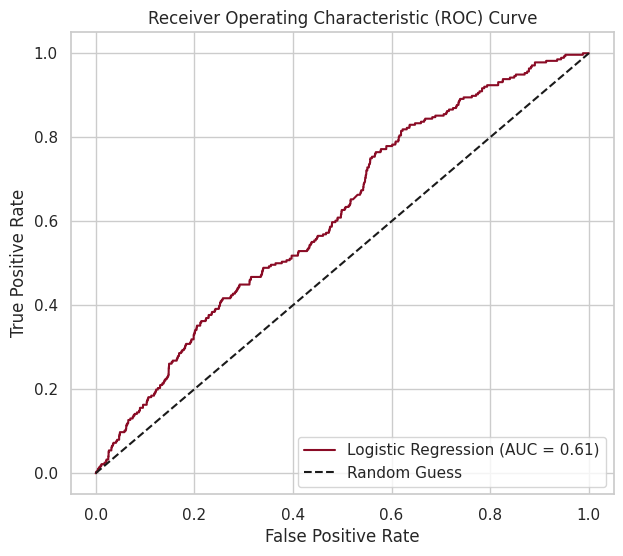

(0.6136901990706015,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [88]:
Test_model(X_train, y_train)

### <a id="1.2">1.2 Remove quasi-constant features</a>
Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. 

- Quasi-constant features have very little variation across the observations
- Typically, a threshold is set (e.g., 95% of the same value) to determine if a feature is quasi-constant.


In [29]:
threshold=0.05
selectvar = VarianceThreshold(threshold)
selectvar.fit(X_train)

NameError: name 'VarianceThreshold' is not defined

In [90]:
print("No. of features before removing quasi-constant variables: ",X_train.shape[1])
print("No. of features after removing quasi-constant variables: ",selectvar.get_support().sum())

No. of features before removing quasi-constant variables:  262
No. of features after removing quasi-constant variables:  224


In [91]:
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [92]:
X_train[X_train.columns[~selectvar.get_support()]].var()

ind_var1_0                    0.011019
ind_var5_0                    0.040786
ind_var8_0                    0.032605
ind_var8                      0.028698
ind_var12                     0.044870
ind_var13_0                   0.049707
ind_var13_corto_0             0.041178
ind_var13_corto               0.039975
ind_var13_largo_0             0.010152
ind_var13                     0.048529
ind_var14_0                   0.022989
ind_var24_0                   0.041700
ind_var24                     0.037928
ind_var25_cte                 0.026353
ind_var26_0                   0.024403
ind_var26_cte                 0.027244
ind_var26                     0.024403
ind_var25_0                   0.023642
ind_var25                     0.023642
ind_var40_0                   0.011019
num_var1                      0.036112
num_var20_0                   0.032029
num_var20                     0.023851
num_var32_0                   0.017730
num_var32                     0.017730
num_var33_0              

In [93]:
# columns name after remove the 51 feature 
X_train = X_train.iloc[:, selectvar.get_support(indices = True)]
X_train.shape

(35000, 224)

#### Create Model with Variance Threshold Method

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6138


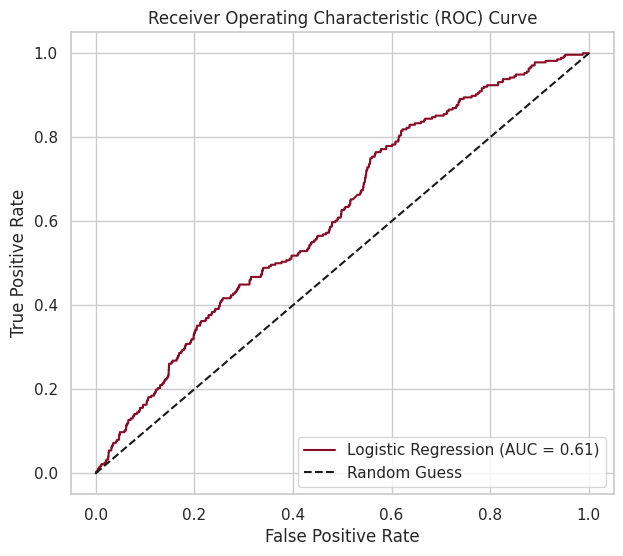

(0.6137882687151368,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [94]:
Test_model(X_train, y_train)

#### 😎**OBSERVATION:**
> By removing constant and quasi-constant features, we reduced the feature space from 370 to 263. 

---
# <a id="2"><div style="text-align: center;"> STATISTICS FILTER METHODS</div></a> 

---

Filter-based methods select features based on their statistical relationship with the target (e.g., correlation, mutual information). The choice of statistical measures depends on the data types of the input and output variables.

![](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)



| **Measure**                  | **Input Type** | **Output Type** | **Relationship Type** | **Use Case**          | **Range**                     |
|------------------------------|----------------|-----------------|-----------------------|-----------------------|-------------------------------|
| Pearson’s Correlation        | Numerical      | Numerical       | Linear                | Regression            | [-1, 1]                  |
| Spearman’s Rank              | Numerical      | Numerical       | Nonlinear             | Regression            | [-1, 1]                   |
| ANOVA                        | Numerical      | Categorical     | Linear                | Classification        | [0, +\infty)              |
| Kendall’s Rank               | Numerical      | Categorical     | Nonlinear             | Classification        | [-1, 1]                   |
| Chi-Squared Test             | Categorical    | Categorical     | Independence          | Classification        | [0, +\infty)              |
| Mutual Information           | Categorical    | Categorical     | Dependency            | Classification        | [0, +\infty)              |


---
### <a id='2.1'>[2.1] Covariance </a>


Covariance measures how much two variables change together. A positive value indicates a positive relationship, while a negative value indicates a negative relationship.
$$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$$
Where:
- $\bar{X}$, $\bar{Y}$: Means of $X$ and $Y$.
- $n$: Number of observations.


In [41]:
# Calculate the covariance matrix
cov_matrix = np.cov(train_data, rowvar=False)  # Set rowvar=False to treat columns as variables

# Extract the covariance between features and the target variable
cov_with_target = cov_matrix[-1, :-1]  # Last row (target) with all features

print("Covariance between features and target variable:")
print(sorted(cov_with_target, reverse=True, key=lambda x: np.abs(x)))

Covariance between features and target variable:
[-1253586.8362547234, -1253586.8362441876, -247843.81592999108, -247843.81592708107, -214046.93192274097, -214046.93192126037, -180250.0479425287, -180250.0479425287, -131105.78667457294, -131105.786666875, -78859.39597485635, -78859.39597485635, -56328.13997866069, -56328.13997866063, -22531.25599056331, -22531.25599056309, -11265.62799640805, -11265.62799640805, -11265.627996408048, -11265.627996408026, -11265.627996407993, -11265.627996407904, -903.5096088206986, -456.2841207309598, -237.93609524402822, -218.34802548693233, -204.51992537925585, -201.11416314245713, -178.41253997150923, -163.21801804508684, -160.97975184466497, -136.5997336034906, -127.79149434359323, -125.07983702342509, -117.76516858767417, -103.02409364365518, 60.815269938324796, -55.096210557852686, -54.529658552693334, -43.10074905617714, -35.57595879294517, -30.753050085022824, -30.588025682692987, -30.419651691762606, -29.25786316441695, -28.746361585841232, -28

#### 😎**OBSERVATION:**

Covariance does not provide a normalized measure of the relationship. This means that it can be difficult to compare the strength of relationships across different pairs of variables. For instance, a covariance of 1000 might indicate a strong relationship for one pair of variables but a weak relationship for another pair.

---
### <a id='2.2'>[2.2] Pearson’s Correlation </a>



Pearson’s correlation is a **normalized covariance** that measures the **linear relationship** between two numerical variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship.

$$r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$
Where:
- $\text{Cov}(X, Y)$: Covariance between $X$ and $Y$.
- $\sigma_X$, $\sigma_Y$: Standard deviations of $X$ and $Y$.


**Calculation Using Pandas**

In [44]:
train_data.corr(method='pearson')

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.000335,-0.001077,0.003184,-0.003910,-0.008545,-0.010468,-0.012000,-0.003037,-0.004483,...,0.010271,0.003740,0.008731,0.009623,0.001131,-0.004168,0.002029,0.001950,0.009935,-0.007315
var3,-0.000335,1.000000,-0.004874,0.001484,0.004234,0.005345,0.001505,0.001710,0.000588,0.000663,...,0.000681,0.000377,0.000633,0.000665,0.000585,0.000591,0.000705,0.000806,0.000492,0.007962
var15,-0.001077,-0.004874,1.000000,0.044042,0.097951,0.103577,0.042961,0.053570,0.006007,0.007664,...,0.029532,0.012349,0.030822,0.031472,0.028464,0.023589,0.035090,0.039443,0.006946,0.097617
imp_ent_var16_ult1,0.003184,0.001484,0.044042,1.000000,0.034639,0.028340,0.010634,0.012114,0.000563,0.002408,...,-0.000784,-0.000434,-0.000548,-0.000498,0.004058,-0.000576,0.003946,0.005183,-0.001041,-0.003519
imp_op_var39_comer_ult1,-0.003910,0.004234,0.097951,0.034639,1.000000,0.884756,0.372874,0.330998,0.022575,0.036657,...,0.010104,0.007268,0.008044,0.009539,0.001693,0.004991,-0.000485,-0.000402,0.008964,0.012177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.004168,0.000591,0.023589,-0.000576,0.004991,0.006756,-0.000537,-0.000603,-0.000211,-0.000237,...,-0.000236,-0.000133,-0.000220,-0.000230,0.402843,1.000000,0.284602,0.299967,0.006189,-0.002878
saldo_medio_var44_ult1,0.002029,0.000705,0.035090,0.003946,-0.000485,-0.001014,-0.000673,-0.000755,-0.000265,-0.000297,...,0.001811,-0.000166,0.003761,0.003370,0.938115,0.284602,1.000000,0.988168,0.003396,-0.002514
saldo_medio_var44_ult3,0.001950,0.000806,0.039443,0.005183,-0.000402,-0.001040,-0.000769,-0.000864,-0.000303,-0.000340,...,0.002470,-0.000190,0.005067,0.004548,0.909588,0.299967,0.988168,1.000000,0.004076,-0.002337
var38,0.009935,0.000492,0.006946,-0.001041,0.008964,0.010494,0.001525,0.002337,0.000304,0.000326,...,0.002244,0.000335,0.002708,0.002612,0.002719,0.006189,0.003396,0.004076,1.000000,-0.019728


**Calculation Using Scipy**

In [57]:
from scipy.stats import pearsonr

results = []
for i in range(X_train.shape[1]):
    res = pearsonr(X_train.iloc[:, i], y_train)
    results.append(res)

In [60]:
sorted(results, key=lambda x:x.statistic)[:10]

[PearsonRResult(statistic=-0.13936305988406755, pvalue=2.6960002902859525e-151),
 PearsonRResult(statistic=-0.13857733604417102, pvalue=1.3350953476166334e-149),
 PearsonRResult(statistic=-0.13029887024333606, pvalue=2.398454124022804e-132),
 PearsonRResult(statistic=-0.126263930264244, pvalue=2.4692140744388254e-124),
 PearsonRResult(statistic=-0.12393604456570123, pvalue=7.894934677378191e-120),
 PearsonRResult(statistic=-0.12251115401913379, pvalue=4.094675843616822e-117),
 PearsonRResult(statistic=-0.07609885057214034, pvalue=4.057569453549241e-46),
 PearsonRResult(statistic=-0.07314247632593746, pvalue=9.935309979608686e-43),
 PearsonRResult(statistic=-0.04237593551914592, pvalue=2.1722923060322825e-15),
 PearsonRResult(statistic=-0.0407258441334078, pvalue=2.4977958550160348e-14)]

---
### <a id='2.3'>[2.3] Spearman’s Rank </a>



Spearman’s correlation measures the **nonlinear relationship** between two numerical variables. It is based on the ranks of the data.

#### **Equation**:
$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$
Where:
- $d_i$: Difference between ranks of $X$ and $Y$.
- $n$: Number of observations.

#### **Numerical Example**:
Consider the following dataset:
- X = 10, 20, 25, 37, 47  
- y = 2, 3, 5, 4, 6

1. **Rank the data**:

| X | Y | Rank(X) | Rank(Y) | $d_i$ | $d_i^2$ |
|---|---|---------|---------|-------|---------|
| 10 | 2 | 1       | 1       | 0     | 0       |
| 20 | 3 | 2       | 2       | 0     | 0       |
| 25 | 5 | 3       | 4       | -1    | 1       |
| 37 | 4 | 4       | 3       | 1     | 1       |
| 47 | 6 | 5       | 5       | 0     | 0       |


2. **Calculate Spearman’s correlation**:
   - Sum of $d_i^2 = 0 + 0 + 1 + 1 + 0 = 2$
   - Number of observations, $n = 5$

Using the formula:
$$\rho = 1 - \frac{6 \cdot 2}{5(5^2 - 1)} = 1 - \frac{12}{5 \cdot 24} = 1 - \frac{12}{120} = 1 - 0.1 = 0.9$$

Thus, the Spearman’s rank correlation coefficient is **0.9**, indicating a strong positive correlation between X and Y.


**Calculation Using Pandas**

In [59]:
train_data.corr(method='spearman')

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.002137,-0.001524,-0.004930,-0.007065,-0.008222,-0.010591,-0.007668,-0.001198,-0.003521,...,0.006566,-0.000582,0.005818,0.005817,-0.003205,-0.000078,-0.001193,-0.001191,-0.001401,-0.007327
var3,-0.002137,1.000000,0.111928,0.028082,0.165113,0.178957,0.164053,0.197840,0.046265,0.051323,...,0.095089,0.038545,0.093235,0.093236,0.031002,0.037267,0.033323,0.033325,0.007582,-0.007150
var15,-0.001524,0.111928,1.000000,0.074020,0.162915,0.170776,0.068930,0.075481,0.023539,0.024740,...,0.031199,0.018085,0.032741,0.032741,0.040309,0.023858,0.048568,0.048569,0.007977,0.133173
imp_ent_var16_ult1,-0.004930,0.028082,0.074020,1.000000,0.251534,0.244210,0.024087,0.022689,0.006444,0.005606,...,0.000355,0.006046,0.010021,0.010021,0.005890,0.000257,0.002241,0.002243,-0.019480,0.002049
imp_op_var39_comer_ult1,-0.007065,0.165113,0.162915,0.251534,1.000000,0.920780,0.179006,0.177514,0.037054,0.041916,...,0.022014,0.008022,0.028351,0.028351,0.013125,0.009039,0.010149,0.010146,-0.007274,-0.005205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.000078,0.037267,0.023858,0.000257,0.009039,0.014403,-0.001537,-0.001700,-0.000557,-0.000586,...,-0.000557,-0.000338,-0.000613,-0.000613,0.632296,1.000000,0.534085,0.534067,0.016452,-0.004844
saldo_medio_var44_ult1,-0.001193,0.033323,0.048568,0.002241,0.010149,0.012121,-0.002877,-0.003182,-0.001043,-0.001097,...,0.026416,-0.000633,0.023820,0.023821,0.828141,0.534085,1.000000,1.000000,0.018075,-0.005780
saldo_medio_var44_ult3,-0.001191,0.033325,0.048569,0.002243,0.010146,0.012118,-0.002877,-0.003182,-0.001043,-0.001097,...,0.026416,-0.000633,0.023820,0.023821,0.828083,0.534067,1.000000,1.000000,0.018076,-0.005780
var38,-0.001401,0.007582,0.007977,-0.019480,-0.007274,-0.011063,0.009956,0.013877,0.008275,0.008802,...,0.010274,0.002633,0.007990,0.007990,0.019395,0.016452,0.018075,0.018076,1.000000,-0.056925


**Calculation Using Scipy**

In [61]:
from scipy.stats import spearmanr

results = []
for i in range(X_train.shape[1]):
    res = spearmanr(X_train.iloc[:, i], y_train)
    results.append(res)

In [63]:
sorted(results, key=lambda x:x.statistic)[:10]

[SignificanceResult(statistic=-0.13936305988406777, pvalue=2.6960002902834033e-151),
 SignificanceResult(statistic=-0.13684202669559564, pvalue=6.813602531525707e-146),
 SignificanceResult(statistic=-0.13456225896227605, pvalue=4.276753854914572e-141),
 SignificanceResult(statistic=-0.12944541784712563, pvalue=1.2484758805897075e-130),
 SignificanceResult(statistic=-0.12515042456208703, pvalue=3.614964303442525e-122),
 SignificanceResult(statistic=-0.12393604456570126, pvalue=7.894934677372273e-120),
 SignificanceResult(statistic=-0.12319846004259008, pvalue=2.0263189800501485e-118),
 SignificanceResult(statistic=-0.1146023996995694, pvalue=1.2474881032253624e-102),
 SignificanceResult(statistic=-0.11415902185637179, pvalue=7.564031764735744e-102),
 SignificanceResult(statistic=-0.11278358427609564, pvalue=1.9371153748797497e-99)]

---
### <a id='2.4'>[2.4] ANOVA Correlation </a>



ANOVA (Analysis of Variance) measures the **linear relationship** between numerical input and categorical output. This method is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In the context of feature selection, ANOVA F-values are used to measure the **discrimination power** of each feature.
- Discrimination power: In a classification task, the goal is to distinguish between different classes or categories of the target variable based on the features. 

#### **Equation**:
$$F = \frac{\text{Between-Group Variability}}{\text{Within-Group Variability}}$$



#### **Numerical Example**:

Consider the following dataset representing the test scores of students from three different teaching methods:

| Teaching Method | Scores |
|-----------------|--------|
| A               | 85     |
| A               | 90     |
| A               | 78     |
| B               | 88     |
| B               | 92     |
| B               | 85     |
| C               | 75     |
| C               | 80     |
| C               | 70     |

1. **Calculate the means**:
   - Mean of Method A: $ \frac{85 + 90 + 78}{3} = 84.33 $
   - Mean of Method B: $ \frac{88 + 92 + 85}{3} = 88.33 $
   - Mean of Method C: $ \frac{75 + 80 + 70}{3} = 75.00 $

2. **Overall mean**:
   - Overall Mean: $ \frac{85 + 90 + 78 + 88 + 92 + 85 + 75 + 80 + 70}{9} = 81.67 $

3. **Between-group variability (SSB)**:
     $$SSB = n \cdot \left( (Mean_A - Overall\_Mean)^2 + (Mean_B - Overall\_Mean)^2 + (Mean_C - Overall\_Mean)^2 \right)$$
     Where $n$ is the number of observations in each group (3 in this case).
     $$SSB = 3 \cdot \left( (84.33 - 81.67)^2 + (88.33 - 81.67)^2 + (75.00 - 81.67)^2 \right) = 3 \cdot (7.11 + 44.44 + 44.44) = 3 \cdot 96.00 = 288.00$$

4. **Within-group variability (SSW)**:
     $$SSW = \sum (X_{ij} - Mean_{group})^2$$

     For Method A: $$ (85 - 84.33)^2 + (90 - 84.33)^2 + (78 - 84.33)^2 = 0.44 + 31.11 + 39.69 = 71.24$$
     For Method B: $$ (88 - 88.33)^2 + (92 - 88.33)^2 + (85 - 88.33)^2 = 0.11 + 13.44 + 10.89 = 24.44$$
     For Method C: $$ (75 - 75.00)^2 + (80 - 75.00)^2 + (70 - 75.00)^2 = 0 + 25 + 25 = 50$$

     $$SSW = 71.24 + 24.44 + 50 = 145.68$$

5. **Calculate the F-statistic**:
   $$F = \frac{SSB / (k - 1)}{SSW / (N - k)}$$
   Where $k$ is the number of groups (3) and $N$ is the total number of observations (9).
   $$F = \frac{288.00 / (3 - 1)}{145.68 / (9 - 3)} = \frac{144.00}{24.28} \approx 5.93$$
   

#### Interperate the results 

- **Higher** the F-value -> **more important** feature -> the feature values for each target class are not all equal -> the feature does **have a discrimination power** between the target classes.

- F-value is significantly **greater than 1**, this is evidence against the null hypothesis, and we conclude that the feature does **have a discrimination power**.


> Compare the calculated F-statistic with the critical F-value from the F-distribution table at a chosen significance level (e.g., 0.05). If the calculated F is greater than the critical value, we reject the null hypothesis, indicating that at least one group mean is significantly different.



#### **ANOVA Function for Feature Selection**

The `ANOVA` function is designed to classify the feature to 4 classes and return 4 dataframes for them. Features are classified into four categories based on their F-scores and p-values:

- **Strong Not Significant**: F-score > 1.0 and p-value > 0.05
- **Strong Significant**: F-score > 1.0 and p-value ≤ 0.05
- **Weak Not Significant**: F-score ≤ 1.0 and p-value > 0.05
- **Weak Significant**: F-score ≤ 1.0 and p-value ≤ 0.05

- **Thresholds:** Use p < 0.05 as a common threshold for significance, and consider domain-specific thresholds for F-scores.



In [ ]:
def Measure_ANOVA(X_train, y_train):
    f_scores, p_values = f_classif(X_train, y_train)

    # Create a DataFrame for features with their F-scores and p-values
    features_info = pd.DataFrame({
        'Feature': X_train.columns,
        'F-score': f_scores,
        'P-value': p_values
    })

    # Classify features based on F-scores and p-values
    strong_not_significant = features_info[(features_info['F-score'] > 1.0) & (features_info['P-value'] > 0.05)]
    strong_significant = features_info[(features_info['F-score'] > 1.0) & (features_info['P-value'] <= 0.05)]
    weak_not_significant = features_info[(features_info['F-score'] <= 1.0) & (features_info['P-value'] > 0.05)]
    weak_significant = features_info[(features_info['F-score'] <= 1.0) & (features_info['P-value'] <= 0.05)]

    return strong_not_significant, strong_significant, weak_not_significant, weak_significant

#### **Interpretation of F-scores and p-values in feature selection**

In feature selection, understanding the interplay between F-scores and p-values is crucial for selecting the most relevant features. Here's a concise interpretation based on different scenarios:


| **F-score** | **p-value** | **Interpretation**                                      | **Implication**                                      |
|-------------|-------------|--------------------------------------------------------|-----------------------------------------------------|
| High        | High| Strong discriminative power, NOT Reliable| Potentially misleading; the feature may appear useful but is not reliable.             |
| High        | Low | Strong discriminative power, Reliable.   | Ideal for feature selection; the feature is both discriminative and statistically significant.    |
| Low         | High| Weak discriminative power, NOT Reliable  | Unlikely to be useful; consider removing the feature.               |
| Low         | Low | Weak discriminative power, Reliable      | Statistically significant but practically weak; evaluate its importance carefully.        |


In [104]:
from sklearn.feature_selection import f_classif

strong_not_significant, strong_significant, weak_not_significant, weak_significant = Measure_ANOVA(X_train, y_train)

In [102]:
print(f"\nStrong Discriminative Power, Not Significant (NOT Reliable) = {len(strong_not_significant)}")
print(strong_not_significant)


Strong Discriminative Power, Not Significant (NOT Reliable) = 29
                           Feature   F-score   P-value
0                             var3  2.218574  0.136368
43                     num_var17_0  1.662853  0.197227
44                       num_var17  1.420030  0.233406
64                     num_var31_0  3.249095  0.071471
65                       num_var31  2.811928  0.093575
68                     num_var37_0  2.992918  0.083638
69                       num_var37  2.992918  0.083638
88                     saldo_var26  1.675693  0.195506
89                     saldo_var25  2.177605  0.140041
100      delta_imp_aport_var13_1y3  3.152053  0.075840
111      delta_num_aport_var13_1y3  3.152053  0.075840
123           imp_aport_var13_ult1  2.222795  0.135996
144                 ind_var10_ult1  2.097639  0.147536
145              ind_var10cte_ult1  1.866630  0.171870
147                  ind_var9_ult1  1.245008  0.264516
148            ind_var43_emit_ult1  3.588613  0.058185

#### 😎**OBSERVATION:**
> These 29 features are said to be significant, but their low p-values indicate that the F-scores may be due to randomness or chance.
> We will consider removing them.

In [110]:
print(f"\nStrong Discriminative Power, Statistically Significant (Reliable) = {len(strong_significant)}")
print(strong_significant)


Strong Discriminative Power, Statistically Significant (Reliable) = 96
                           Feature     F-score       P-value
1                            var15  336.706743  7.475497e-75
3          imp_op_var39_comer_ult1    5.189841  2.272529e-02
7          imp_op_var40_efect_ult1   10.131870  1.458549e-03
8          imp_op_var40_efect_ult3   16.798762  4.165404e-05
10         imp_op_var41_comer_ult1    5.402151  2.011764e-02
..                             ...         ...           ...
200   saldo_medio_var13_corto_ult3   22.963628  1.657719e-06
201  saldo_medio_var13_largo_hace2    5.306382  2.125327e-02
203   saldo_medio_var13_largo_ult1    5.499393  1.902863e-02
204   saldo_medio_var13_largo_ult3    5.642832  1.753223e-02
223                          var38   13.626008  2.234122e-04

[96 rows x 3 columns]


#### 😎**OBSERVATION:**
> These 96 features represent a robust set of predictors that can be leveraged to improve model performance and provide insights into the underlying data relationships.

In [111]:
print(f"\nWeak Discriminative Power, Not Significant (NOT Reliable)= {len(weak_not_significant)}")
print(weak_not_significant)


Weak Discriminative Power, Not Significant (NOT Reliable)= 99
                     Feature   F-score   P-value
2         imp_ent_var16_ult1  0.433387  0.510336
4    imp_op_var39_comer_ult3  0.639868  0.423764
5    imp_op_var40_comer_ult1  0.142398  0.705911
6    imp_op_var40_comer_ult3  0.043739  0.834341
9          imp_op_var40_ult1  0.257947  0.611537
..                       ...       ...       ...
218   saldo_medio_var33_ult3  0.377446  0.538977
219  saldo_medio_var44_hace2  0.308679  0.578496
220  saldo_medio_var44_hace3  0.289942  0.590261
221   saldo_medio_var44_ult1  0.221227  0.638110
222   saldo_medio_var44_ult3  0.191179  0.661940

[99 rows x 3 columns]


#### 😎**OBSERVATION:**
> These 99 features represent a robust set of predictors that can be leveraged to improve model performance and provide insights into the underlying data relationships.

In [112]:
print(f"\nWeak Discriminative Power, Statistically Significant (Reliable)= {len(weak_significant)}")
print(weak_significant)


Weak Discriminative Power, Statistically Significant (Reliable)= 0
Empty DataFrame
Columns: [Feature, F-score, P-value]
Index: []


---
### <a id='2.5'>[2.5] Kendall’s Rank </a>



Kendall’s tau measures the **nonlinear relationship** between numerical input and ordinal categorical output. It evaluates the **concordance** and **discordance** of pairs of observations.

#### **Equation**:
$$\tau = \frac{C - D}{\frac{1}{2} n(n - 1)}$$

Where:
- $C$: Number of concordant pairs.
- $D$: Number of discordant pairs.

#### **Interpretation**:
- $\tau = 1$: Perfect agreement (all pairs are concordant).
- $\tau =-1$: Perfect disagreement (all pairs are discordant).
- $\tau = 0$: No association.

#### **Numerical Example**:

**Step 1: Define the Data**
Let’s consider the following data:
- $X = [1, 2, 3, 4, 5]$ (numerical input).
- $Y = [0, 1, 0, 1, 0]$ (ordinal categorical output).

**Step 2: Identify Concordant and Discordant Pairs**
- **Concordant Pairs $C$**: Pairs where the order of $X$ and $Y$ agrees.
- **Discordant Pairs $D$**: Pairs where the order of $X$ and $Y$ disagrees.

**For the given data:**
1. Pair $(1, 0)$ and $(2, 1)$: ($X_1$ < $X_2$) and ($Y_1$ < $Y_2$) → (1 < 2) and (0 < 1) → **Concordant**.
2. Pair $(1, 0)$ and $(3, 0)$: ($X_1$ < $X_2$) and ($Y_1$ = $Y_2$) → (1 < 3) and (0 = 0) → **Neither**.
3. Pair $(1, 0)$ and $(4, 1)$: ($X_1$ < $X_2$) and ($Y_1$ < $Y_2$) → (1 < 4) and (0 < 1) → **Concordant**.
4. Pair $(1, 0)$ and $(5, 0)$: ($X_1$ < $X_2$) and ($Y_1$ = $Y_2$) → (1 < 5) and (0 = 0) → **Neither**.
5. Pair $(2, 1)$ and $(3, 0)$: ($X_1$ < $X_2$) and ($Y_1$ > $Y_2$) → (2 < 3) and (1 > 0) → **Discordant**.
6. Pair $(2, 1)$ and $(4, 1)$: ($X_1$ < $X_2$) and ($Y_1$ = $Y_2$) → (2 < 4) and (1 = 1) → **Neither**.
7. Pair $(2, 1)$ and $(5, 0)$: ($X_1$ < $X_2$) and ($Y_1$ > $Y_2$) → (2 < 5) and (1 > 0) → **Discordant**.
8. Pair $(3, 0)$ and $(4, 1)$: ($X_1$ < $X_2$) and ($Y_1$ < $Y_2$) → (3 < 4) and (0 < 1) → **Concordant**.
9. Pair $(3, 0)$ and $(5, 0)$: ($X_1$ < $X_2$) and ($Y_1$ = $Y_2$) → (3 < 5) and (0 = 0) → **Neither**.
10. Pair $(4, 1)$ and $(5, 0)$: ($X_1$ < $X_2$) and ($Y_1$ > $Y_2$) → (4 < 5) and (1 > 0) → **Discordant**.

- **Concordant Pairs $C$**: 3
- **Discordant Pairs $D$**: 3

##### **Step 3: Calculate Kendall’s Tau**
Using the formula:
$$\tau = \frac{C - D}{\frac{1}{2} n(n - 1)}$$
Where (n = 5):
$$\tau = \frac{3 - 3}{\frac{1}{2} \cdot 5 \cdot 4} = \frac{0}{10} = 0$$

**Calculation Using Scipy**

In [113]:
train_data.corr(method='kendall')

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001735,-0.001044,-0.003973,-0.005584,-0.006469,-0.008639,-0.006254,-0.000978,-0.002875,...,0.005360,-0.000475,0.004749,0.004749,-0.002615,-0.000064,-0.000973,-0.000971,-0.000956,-0.005983
var3,-0.001735,1.000000,0.094573,0.027595,0.158966,0.171358,0.162957,0.196502,0.045998,0.051027,...,0.094540,0.038325,0.092694,0.092694,0.030816,0.037052,0.033119,0.033121,0.006241,-0.007109
var15,-0.001044,0.094573,1.000000,0.062133,0.134246,0.140166,0.058407,0.063950,0.019958,0.020976,...,0.026457,0.015337,0.027766,0.027766,0.034178,0.020231,0.041178,0.041178,0.005966,0.112940
imp_ent_var16_ult1,-0.003973,0.027595,0.062133,1.000000,0.241308,0.232874,0.023780,0.022395,0.006367,0.005539,...,0.000351,0.005975,0.009902,0.009902,0.005819,0.000254,0.002214,0.002216,-0.015958,0.002025
imp_op_var39_comer_ult1,-0.005584,0.158966,0.134246,0.241308,1.000000,0.900443,0.173239,0.171695,0.035853,0.040557,...,0.021300,0.007762,0.027431,0.027431,0.012697,0.008746,0.009817,0.009815,-0.005865,-0.005037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.000064,0.037052,0.020231,0.000254,0.008746,0.013856,-0.001535,-0.001698,-0.000557,-0.000586,...,-0.000557,-0.000338,-0.000613,-0.000613,0.632101,1.000000,0.533835,0.533829,0.013645,-0.004844
saldo_medio_var44_ult1,-0.000973,0.033119,0.041178,0.002214,0.009817,0.011656,-0.002873,-0.003177,-0.001043,-0.001096,...,0.026400,-0.000633,0.023804,0.023806,0.827812,0.533835,1.000000,0.999906,0.014986,-0.005777
saldo_medio_var44_ult3,-0.000971,0.033121,0.041178,0.002216,0.009815,0.011653,-0.002873,-0.003177,-0.001043,-0.001096,...,0.026400,-0.000633,0.023804,0.023806,0.827788,0.533829,0.999906,1.000000,0.014988,-0.005777
var38,-0.000956,0.006241,0.005966,-0.015958,-0.005865,-0.008861,0.008250,0.011496,0.006862,0.007300,...,0.008520,0.002184,0.006627,0.006627,0.016084,0.013645,0.014986,0.014988,1.000000,-0.047215


**Calculation Using Scipy**

In [117]:
from scipy.stats import kendalltau

results = []
for i in range(X_train.shape[1]):
    res = kendalltau(X_train.iloc[:, i], y_train)
    results.append(res)

In [118]:
sorted(results, key=lambda x:x.statistic)[:10]

[SignificanceResult(statistic=-0.1393630598840678, pvalue=7.562941841446148e-150),
 SignificanceResult(statistic=-0.13378343588149685, pvalue=1.5086886874252147e-144),
 SignificanceResult(statistic=-0.12790177796970542, pvalue=1.4848158907178897e-129),
 SignificanceResult(statistic=-0.12754785228922103, pvalue=7.731225517209381e-140),
 SignificanceResult(statistic=-0.12393604456570127, pvalue=6.306686620316778e-119),
 SignificanceResult(statistic=-0.12307451339491815, pvalue=1.5407069036930344e-117),
 SignificanceResult(statistic=-0.10803456118614324, pvalue=3.1384161828237756e-121),
 SignificanceResult(statistic=-0.09941813681681014, pvalue=5.6809306174602125e-102),
 SignificanceResult(statistic=-0.09903535390720883, pvalue=8.025394564414794e-99),
 SignificanceResult(statistic=-0.09833144224133634, pvalue=3.364651503583917e-101)]

---
### <a id='2.6'>[2.6] Chi-Squared Test </a>



The Chi-Squared test measures the **independence** between two categorical variables.

#### **Equation**:
$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$
Where:
- $O_i$: Observed frequency.
- $E_i$: Expected frequency.

#### **Numerical Example**:

##### **Step 1: Define the Data**
Consider the following contingency table for two categorical variables X and Y:

|       | Y = A | Y = B | **Total** |
|-------|----------|----------|-----------|
| X = 1 | 10       | 20       | 30        |
| X = 2 | 15       | 25       | 40        |
| **Total** | 25       | 45       | 70        |

##### **Step 2: Calculate Expected Frequencies**
The expected frequency for each cell is calculated as:
$$
E_i = \frac{\text{Row Total} \times \text{Column Total}}{\text{Grand Total}}
$$

- For X = 1, Y = A:
  $$
  E_{1A} = \frac{30 \times 25}{70} = 10.71
  $$
- For X = 1, Y = B:
  $$
  E_{1B} = \frac{30 \times 45}{70} = 19.29
  $$
- For X = 2, Y = A:
  $$
  E_{2A} = \frac{40 \times 25}{70} = 14.29
  $$
- For X = 2, Y = B:
  $$
  E_{2B} = \frac{40 \times 45}{70} = 25.71
  $$

##### **Step 3: Compute Chi-Squared Statistic**
Using the formula:
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

- For X = 1, Y = A:
  $$
  \frac{(10 - 10.71)^2}{10.71} = \frac{0.5041}{10.71} \approx 0.047
  $$
- For X = 1, Y = B:
  $$
  \frac{(20 - 19.29)^2}{19.29} = \frac{0.5041}{19.29} \approx 0.026
  $$
- For X = 2, Y = A:
  $$
  \frac{(15 - 14.29)^2}{14.29} = \frac{0.5041}{14.29} \approx 0.035
  $$
- For X = 2, Y = B:
  $$
  \frac{(25 - 25.71)^2}{25.71} = \frac{0.5041}{25.71} \approx 0.020
  $$

Summing these values:
$$
\chi^2 = 0.047 + 0.026 + 0.035 + 0.020 = 0.128
$$


**Calculation Using Scipy**

In [147]:
from scipy.stats import chi2_contingency

non_neg_cols = X_train.loc[:, X_train.min() >=0].columns
print(len(non_neg_cols))
non_neg_cols[:5]

200


Index(['var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1'],
      dtype='object')

In [151]:
# Create a contingency table
contingency_table = pd.crosstab( y_train, X_train[non_neg_cols[0]])
contingency_table

var15,5,6,7,8,9,10,11,12,13,14,...,92,93,94,95,96,97,98,99,100,102
TARGET,,,,,,,,,,,,,,,,,,,,,
0,12,8,4,3,12,8,8,7,5,9,...,2,5,5,2,5,2,1,2,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [159]:
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
print(f"chi2-statstics: {chi2_stat: 0.3f}", f"\tp-value: {p_value: 0.5f}")

chi2-statstics:  831.262 	p-value:  0.00000


In [162]:
chi2_results = []

for col in non_neg_cols:

    contingency_table = pd.crosstab(y_train, X_train[col])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results.append((col, chi2_stat, p_value))

chi2_df= pd.DataFrame(chi2_results, columns=["feature", "chi2_statistics", "pvalue"])
chi2_df.sort_values(by='chi2_statistics', ascending=False)
chi2_df.head(5)

,feature,chi2_statistics,pvalue
0,var15,831.261859,1.630607e-117
1,imp_ent_var16_ult1,504.587001,1.359275e-07
2,imp_op_var39_comer_ult1,3661.917007,9.702240e-01
3,imp_op_var39_comer_ult3,4348.214142,9.810988e-01
4,imp_op_var40_comer_ult1,224.810575,1.892852e-05


**Calculation Using Scikit-learn**

In [165]:
from sklearn.feature_selection import chi2

chi2_df = pd.DataFrame(non_neg_cols, columns=["feature"])
chi2_scores, pvalues = chi2(X_train[non_neg_cols], y_train)

chi2_df["chi2_statistics"]=chi2_scores
chi2_df["p_values"]=pvalues

chi2_df.sort_values(by='chi2_statistics', ascending=False)
chi2_df.head(5)

,feature,chi2_statistics,p_values
0,var15,1688.932509,0.000000e+00
1,imp_ent_var16_ult1,17655.183889,0.000000e+00
2,imp_op_var39_comer_ult1,8436.548447,0.000000e+00
3,imp_op_var39_comer_ult3,1666.587733,0.000000e+00
4,imp_op_var40_comer_ult1,398.375437,1.243321e-88


#### 😎**OBSERVATION:**
> uncomment the prevuios cell to see the syntax error, cause chi-squared test requires non-negative features. So, we will use another type.

---
### <a id='2.7'>[2.7] Mutual Information </a>


[**Mutual Information**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.

**Mutual Information Formula**:

$$I(X; Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \left( \frac{p(x, y)}{p(x) p(y)} \right)$$
- $p(x, y)$: Joint probability distribution of $X$ and $Y$.
- $p(x), p(y)$: Marginal probability distributions of $X$ and $Y$.
   
**Notes**:
- Mutual information (MI) is a non-negative value, which measures the dependency between the variables.
- Mutual Information (MI) is typically calculated for categorical variables. If X and Y are continuous, they need to be discretized (binned) into categories before computing MI. 
- MI quantifies the dependency between variables, with higher values indicating stronger relationships.
- For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. 



#### Numerical Example on Mutual Information

Let’s calculate **Mutual Information (MI)** between two variables X and Y using a simple example.

**Step 1: Define the Data**
Consider the following joint probability distribution for X and Y:
$$P(X, Y) = \frac{\text{Number of occurrences of } (X, Y)}{\text{Total number of observations}}$$

|       | Y = 0     | Y = 1    | **Marginal p(X)**     |
|-------|-----------|----------|-----------------------|
| X = 0 | 0.3       | 0.2      | 0.5                   |
| X = 1 | 0.1       | 0.4      | 0.5                   |
| **Marginal p(Y)** | 0.4      | 0.6                   | 1.0|


**Step 2: Mutual Information by:**
$$I(X; Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \left( \frac{p(x, y)}{p(x) p(y)} \right)$$

- **For X = 0, Y = 0**:
   $$p(x, y) = 0.3, \quad p(x) \cdot p(y) = 0.5 \cdot 0.4 = 0.2$$
   $$\log \left( \frac{0.3}{0.2} \right) = \log(1.5) \approx 0.405$$
   $$\text{Contribution} = 0.3 \cdot 0.405 \approx 0.1215$$

- **For X = 0, Y = 1**:
   $$p(x, y) = 0.2, \quad p(x) \cdot p(y) = 0.5 \cdot 0.6 = 0.3$$
   $$\log \left( \frac{0.2}{0.3} \right) = \log(0.666) \approx -0.405$$
   $$\text{Contribution} = 0.2 \cdot (-0.405) \approx -0.081$$

- **For X = 1, Y = 0**:
   $$p(x, y) = 0.1, \quad p(x) \cdot p(y) = 0.5 \cdot 0.4 = 0.2$$
   $$\log \left( \frac{0.1}{0.2} \right) = \log(0.5) \approx -0.693$$
   $$\text{Contribution} = 0.1 \cdot (-0.693) \approx -0.0693$$

- **For X = 1, Y = 1**:
   $$p(x, y) = 0.4, \quad p(x) \cdot p(y) = 0.5 \cdot 0.6 = 0.3$$
   $$\log \left( \frac{0.4}{0.3} \right) = \log(1.333) \approx 0.287$$
   $$\text{Contribution} = 0.4 \cdot 0.287 \approx 0.1148$$


**Step 4: Sum the Contributions**
$$I(X; Y) = 0.1215 + (-0.081) + (-0.0693) + 0.1148 \approx 0.086$$



In [ ]:
from sklearn.feature_selection import mutual_info_classif
MIs = mutual_info_classif(X_train, y_train)
print(sorted(MIs, reverse=True)[:20])

---
### <a id='2.8'>[2.8] Variance Inflation Factor (VIF)</a>



The **Variance Inflation Factor (VIF)** is a statistical measure used to detect **multicollinearity** in a regression model. Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated, which can lead to unreliable and unstable estimates of regression coefficients.


#### **How is VIF Calculated?**
For a given predictor variable $X_j$, the VIF is calculated as:
$$\text{VIF}_j = \frac{1}{1 - R_j^2}$$
Where:
- $R_j^2$: The coefficient of determination (R-squared) obtained by regressing $X_j$ on all other predictor variables in the model.

#### **Steps to Calculate VIF**
1. **Fit a Regression Model**: For each predictor variable $X_j$, fit a regression model where $X_j$ is the dependent variable, and all other predictors are independent variables.
2. **Calculate $R_j^2$**: Obtain the R-squared value from the regression model.
3. **Compute VIF**: Use the formula $\text{VIF}_j = \frac{1}{1 - R_j^2}$.
    - VIF starts at 1 and has no upper limit when no correlation between the independent variable and the other variables.
    - VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

#### **Interpretation of VIF**

- **VIF = 1**: No multicollinearity (the feature is not correlated with other features).
- **1 < VIF < 5**: Moderate multicollinearity (generally acceptable).
- **VIF ≥ 5**: High multicollinearity (the feature is highly correlated with others, and the model may be unreliable).
- **VIF ≥ 10**: Severe multicollinearity (the feature should be removed or addressed).

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

In [8]:
%%time
calculate_vif(X_train.iloc[:, :10])

CPU times: user 1.05 s, sys: 2.1 s, total: 3.14 s
Wall time: 567 ms


,Feature,VIF
0,ID,2.869556
1,var3,1.001539
2,var15,2.942893
3,imp_ent_var16_ult1,1.004836
4,imp_op_var39_comer_ult1,5.487633
5,imp_op_var39_comer_ult3,5.604248
6,imp_op_var40_comer_ult1,4.584425
7,imp_op_var40_comer_ult3,4.671748
8,imp_op_var40_efect_ult1,12.941836
9,imp_op_var40_efect_ult3,12.961863


In [ ]:
# def remove_high_vif_features(X, threshold=5):
#     vif_data = calculate_vif(X)
#     high_vif_features = vif_data[vif_data["VIF"] > threshold]
    
#     if len(high_vif_features) == 0:
#         print("No features with VIF greater than the threshold.")
#         return X
#     else:
#         print("Features with high VIF:", high_vif_features["Feature"].tolist())
#         # Drop the features with high VIF
#         X_filtered = X.drop(columns=high_vif_features["Feature"].tolist())
#         print("Removed high VIF features. New shape:", X_filtered.shape)
#         return X_filtered

In [ ]:
# %%time
# threshold_vif = 10
# X_train = remove_high_vif_features(X_train, threshold_vif)
# X_train.shape

---
# <a id="2"><div style="text-align: center;">WRAPPER METHODS</div></a> 

---


This approach tries to find the optimal set of features by iteratively adding or removing features and assessing the model's performance.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png" width = 500>

**Image source** : AnalyticsVidhya

#### **Key Considerations:**

* **pre-set evaluation criteria:** Choose a metric relevant to your task (e.g., roc_auc for classification , R-squared for regression).
* **Greedy Method:** This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations.
* **Overfitting:** Carefully validate the selected features to avoid overfitting the training data.


---
## <a id="3.1">[3.1] Forward Selection</a>



Starts with an empty set of features and iteratively adds the feature that improves the model's performance the most until no further improvement is observed.

#### **Algorithm:**

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. 

In the second step, it evaluates all possible combinations of the selected best feature and a second one, and selects the pair (best one, another one) that produce the best performing.

1. Initialize the feature set with no features.
2. For each feature not in the set:
    * Add the feature to the set.
    * Train the model with the current feature set.
    * Evaluate the model's performance using a metric (e.g., auc, r-sqaure).
3. Select the feature that results in the best performance and add it to the final feature set.
4. Repeat steps 2-3 until no further improvement is observed.


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [10]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(X_train.select_dtypes(include=numerics).columns)
X_train[numerical_vars].shape

(35000, 370)

### **Hard-coded method**

In [28]:
%%time

iterations = 5 # This mean that we will chosse 30 feature from the whole
scoring = 'roc_auc'
selected_features = []
remain_features = list(X_train.columns)
best_score = float('-inf')

results = []
print("-" * 70)

for i in range(iterations):
    print(f"Iteration [{i+1}]: Model trained on {i+1} feature/s")
    print("-" * 70)

    best_feature = None
    best_iter_score = best_score

    for feature in remain_features:
        tmp_features = selected_features + [feature]
        model = LogisticRegression()
        scores = cross_val_score(
            model, X_train[tmp_features], y_train, cv=3, scoring=scoring
        )
        avg_score = scores.mean()
        print(f"  Feature: {feature:<20} Score: {avg_score:.4f}")
        results.append([i + 1, feature, avg_score])

        if avg_score > best_iter_score:
            best_feature = feature
            best_iter_score = avg_score

    if best_feature is not None:
        selected_features.append(best_feature)
        remain_features.remove(best_feature)
        best_score = best_iter_score
        print(f"> \033[1m\033[92mSelected Feature: {best_feature:<100}, Score: {best_score:.4f}\033[0m\n")

    else:
        print(f"> \033[1m\033[91mNo further improvement found. Stopping.\n")
        break


----------------------------------------------------------------------
Iteration [1]: Model trained on 1 feature/s
----------------------------------------------------------------------
  Feature: ID                   Score: 0.5524
  Feature: var3                 Score: 0.4972
  Feature: var15                Score: 0.6956
  Feature: imp_ent_var16_ult1   Score: 0.4989
  Feature: imp_op_var39_comer_ult1 Score: 0.4955
  Feature: imp_op_var39_comer_ult3 Score: 0.4944
  Feature: imp_op_var40_comer_ult1 Score: 0.5011
  Feature: imp_op_var40_comer_ult3 Score: 0.4992
  Feature: imp_op_var40_efect_ult1 Score: 0.5020
  Feature: imp_op_var40_efect_ult3 Score: 0.5020
  Feature: imp_op_var40_ult1    Score: 0.5009
  Feature: imp_op_var41_comer_ult1 Score: 0.4960
  Feature: imp_op_var41_comer_ult3 Score: 0.4954
  Feature: imp_op_var41_efect_ult1 Score: 0.5139
  Feature: imp_op_var41_efect_ult3 Score: 0.5147
  Feature: imp_op_var41_ult1    Score: 0.5012
  Feature: imp_op_var39_efect_ult1 Score: 0.5142

In [41]:
results = pd.DataFrame(results, columns=["n_features", "candidate_feature", "score"])
results.head(5)

,n_features,candidate_feature,score
0,1,ID,0.552431
1,1,var3,0.497212
2,1,var15,0.695566
3,1,imp_ent_var16_ult1,0.498876
4,1,imp_op_var39_comer_ult1,0.495491


In [59]:
idxmax = results.groupby('n_features')['score'].idxmax()

conclusion = pd.DataFrame({
    'best_feature': results.loc[idxmax, 'candidate_feature'],
    'best_score': results.loc[idxmax, 'score'],
    'std_score': results.groupby('n_features')['score'].std()
}).reset_index()

conclusion

,index,best_feature,best_score,std_score
0,1,NaN,NaN,0.033830
1,2,var15,0.695566,0.038478
2,3,NaN,NaN,0.028363
3,4,NaN,NaN,0.047134
4,5,NaN,NaN,0.048761
5,508,num_var30,0.758560,NaN
6,920,saldo_var30,0.770400,NaN
7,1134,ind_var8_0,0.774896,NaN
8,1489,imp_op_var39_efect_ult1,0.776935,NaN


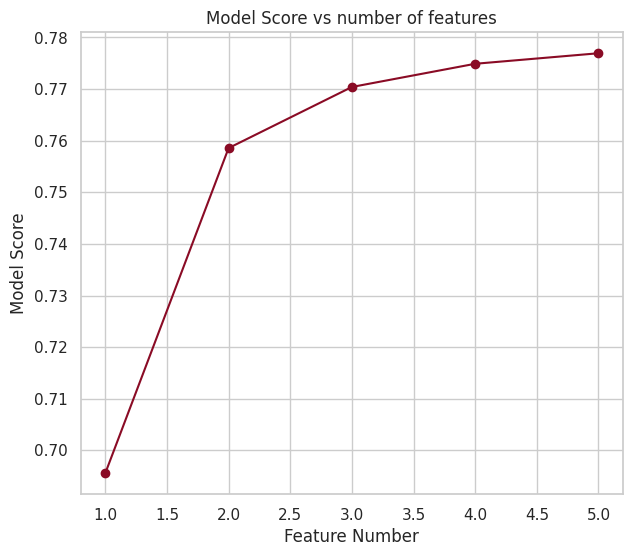

In [46]:
import matplotlib.pyplot as plt

# Create the line plot
plt.plot(conclusion.index, conclusion.values, marker='o')
plt.xlabel("Feature Number")
plt.ylabel("Model Score")
plt.title("Model Score vs number of features")
plt.show()

In [ ]:
# Create the line plot with error bars
plt.errorbar(conclusion.index, conclusion['best_score'], yerr=conclusion['std_score'], marker='o', capsize=5)
plt.xlabel("Feature Number")
plt.ylabel("Model Score")
plt.title("Model Score vs number of features")
plt.show()

#### **Create Model with Sequantial Forward Selection**

In [ ]:
print(f" \033[1m\033[93mFinal Selected Features: {selected_features}")

 Final Selected Features: ['var15', 'num_var30', 'saldo_var30', 'ind_var8_0', 'imp_op_var39_efect_ult1']


Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.7797


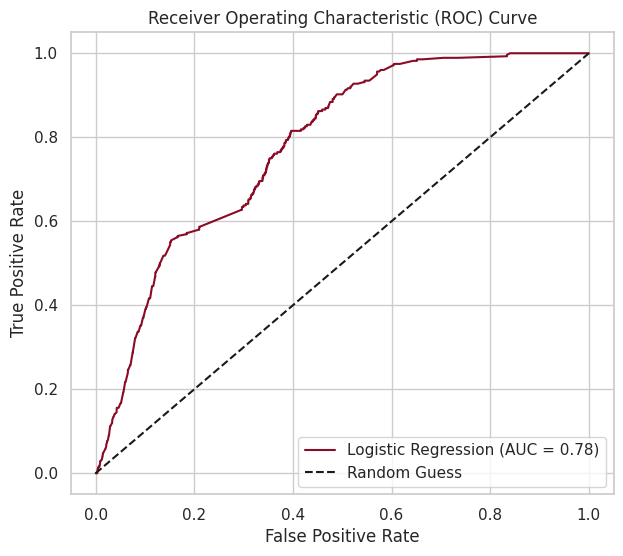

(0.7797094444300754,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [78]:
Test_model(X_train[selected_features], y_train)

### **Using `mlxtend`**



The `SequentialFeatureSelector` from the `mlxtend` library to perform feature selection. This method sequentially adds (or removes) features to find the optimal subset of features for a given model, in this case, `LogisticRegression`. Here's a breakdown of the parameters and how to handle the output:

- **`estimator`**: The model used to evaluate feature subsets.
- **`k_features`**: The number of features to select. Replace `iterations` with the desired number of features.
- **`forward`**: Performs forward selection (adds features sequentially). Set to `False` for backward selection.
- **`floating`**: chooseing `False` disables floating selection, which allows features to be added or removed at each step.
- **`scoring`**: The metric used to evaluate feature subsets (e.g., `accuracy`, `f1`, `roc_auc`). 
- **`cv`**: Uses k-fold cross-validation to evaluate feature subsets.


In [49]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector 

sfs = SequentialFeatureSelector(LogisticRegression(), 
           k_features=iterations, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring=scoring,
           cv=3)

sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   29.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  1.9min

[2025-01-03 02:10:01] Features: 1/5 -- score: 0.6954012737420033[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   12.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   39.8s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  1.8min

[2025-01-03 02:11:50] Features: 2/5 -- score: 0.7586909269989568[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   18.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   53.9s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  2.5min

[2025-01-03 02:14:22] Features: 3/5 -- score: 0.7703222738152306[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  9.0min

[2025-01-03 02:23:31] Features: 4/5 -- score: 0.7752350344172975[Paralle

CPU times: user 47min 4s, sys: 2h 19min 38s, total: 3h 6min 43s
Wall time: 23min 53s


SequentialFeatureSelector(cv=3, estimator=LogisticRegression(),
                          k_features=(5, 5), scoring='roc_auc', verbose=2)

In [60]:
# Get the selected feature indices and names
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = [X_train.columns[idx] for idx in selected_feature_indices]

print(f"> Selected Features: {selected_feature_names}")
print(f"> Best Score ({scoring}): {sfs.k_score_:.4f}")

> Selected Features: ['var15', 'ind_var26_cte', 'num_var30', 'saldo_var30', 'num_var22_ult3']
> Best Score (roc_auc): 0.7753


#### **Create Model with Sequantial Forward Selection**

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.7199


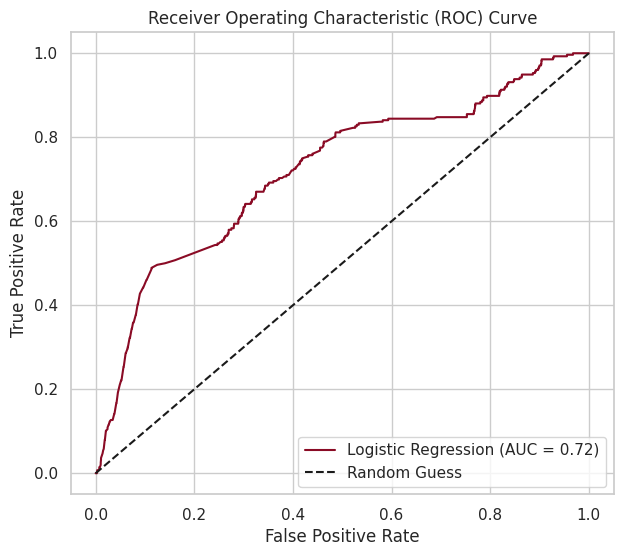

(0.7198910025950738,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [76]:
Test_model(X_train[selected_feature_names], y_train)

---
## <a id="3.2">[3.2] Backward Elimination</a>



It starts with a model that includes all features and then systematically removes features one by one, evaluating the model's performance after each removal. The goal is to find a subset of features that minimizes model complexity while maintaining or improving performance.

#### **Algorithm:**

1. Initialize the feature set with all features.
2. For each feature:
    - Temporarily remove a feature.
    - Train the model with the current feature set.
    - Evaluate the model's performance using a metric (e.g., auc, r-sqaure).
3. Remove the feature that results in the best performance and add it to the final feature set.
4. Repeat steps 2-3 until no further improvement is observed.

### **Hard-coded method**

In [81]:
%%time 

iterations = 5
scoring = 'roc_auc'
selected_features = list(X_train.columns)  # Start with all features
remain_features = []
best_score = float('-inf')

results = []
print("-" * 70)

for i in range(iterations):
    print(f"Iteration [{i+1}]: Training the model on {iterations-i} feature/s")
    print("-" * 70)

    best_feature_to_remove = None
    best_iter_score = best_score

    for feature in selected_features:  # Loop through selected features
        tmp_features = selected_features.copy()
        tmp_features.remove(feature)  # Temporarily remove feature
        model = LogisticRegression()
        scores = cross_val_score(model, X_train[tmp_features],
                                 y_train, cv=3, scoring=scoring)
        avg_score = scores.mean()
        # print(f"  Feature: {feature:<30} Score: {avg_score:.4f}")
        results.append([i + 1, feature, avg_score])

        if avg_score > best_iter_score:
            best_feature_to_remove = feature
            best_iter_score = avg_score

    if best_feature_to_remove is not None:
        selected_features.remove(best_feature_to_remove)
        remain_features.append(best_feature_to_remove)  # Move to remain_features
        best_score = best_iter_score
        print(f"> \033[1m\033[92mRemoved Feature: {best_feature_to_remove:<30}, Score: {best_score:.4f}\033[0m\n")
    else:
        print(f"> \033[1m\033[91mNo further improvement found. Stopping.\n")
        break


----------------------------------------------------------------------
Iteration [1]: Training the model on 5 feature/s
----------------------------------------------------------------------


: 

In [ ]:
results = pd.DataFrame(results, columns=["n_features", "candidate_feature_to_be_removed", "score"])
results.head(5)

,n_features,candidate_feature,score
0,1,ID,0.552431
1,1,var3,0.497212
2,1,var15,0.695566
3,1,imp_ent_var16_ult1,0.498876
4,1,imp_op_var39_comer_ult1,0.495491


In [ ]:
idxmax = results.groupby('n_features')['score'].idxmax()

conclusion = pd.DataFrame({
    'worst_feature': results.loc[idxmax, 'candidate_feature_to_be_removed'],
    'worst_score': results.loc[idxmax, 'score'],
    'std_score': results.groupby('n_features')['score'].std()
}).reset_index()

conclusion

,index,best_feature,best_score,std_score
0,1,NaN,NaN,0.033830
1,2,var15,0.695566,0.038478
2,3,NaN,NaN,0.028363
3,4,NaN,NaN,0.047134
4,5,NaN,NaN,0.048761
5,508,num_var30,0.758560,NaN
6,920,saldo_var30,0.770400,NaN
7,1134,ind_var8_0,0.774896,NaN
8,1489,imp_op_var39_efect_ult1,0.776935,NaN


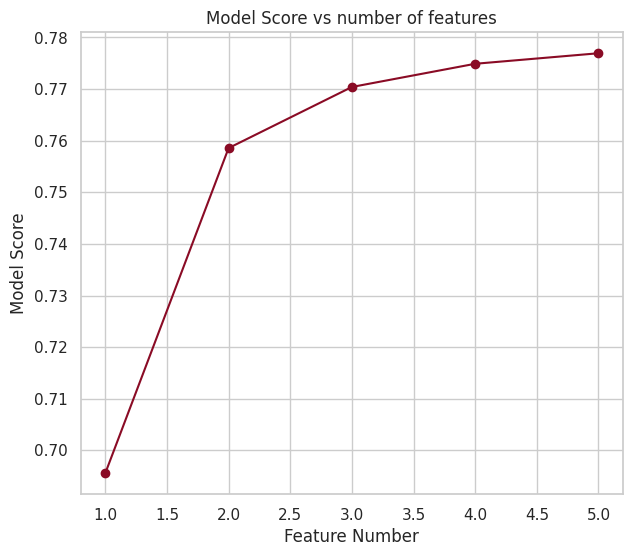

In [ ]:
import matplotlib.pyplot as plt

# Create the line plot
plt.plot(conclusion.index, conclusion.values, marker='o')
plt.xlabel("Feature Number")
plt.ylabel("Model Score")
plt.title("Model Score vs number of features")
plt.show()

In [ ]:
# Create the line plot with error bars
plt.errorbar(conclusion.index, conclusion['worst_score'], yerr=conclusion['std_score'], marker='o', capsize=5)
plt.xlabel("Feature Number")
plt.ylabel("Model Score")
plt.title("Model Score vs number of features")
plt.show()

#### **Create Model with Sequantial Forward Selection**

In [ ]:
print(f" \033[1m\033[93mFinal Selected Features: {selected_features}")

 Final Selected Features: ['var15', 'num_var30', 'saldo_var30', 'ind_var8_0', 'imp_op_var39_efect_ult1']


Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.7797


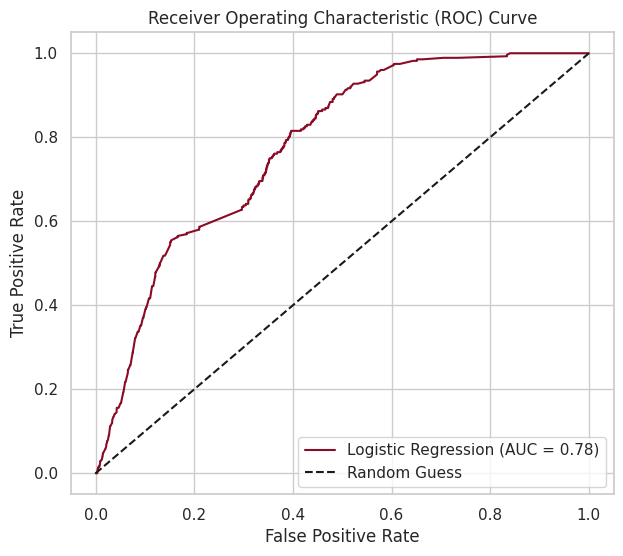

(0.7797094444300754,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [ ]:
Test_model(X_train[selected_features], y_train)

#### **Using `mlxtend`**

In [ ]:
sfs = SequentialFeatureSelector(LogisticRegression(), 
           k_features=iterations, 
           forward=False, # this is the only diffrence from the forward method
           floating=False, 
           verbose=2,
           scoring=scoring,
           cv=3)

sfs.fit(np.array(trans_X_train), y_train)

In [ ]:
# Get the selected feature indices and names
selected_feature_names = [X_filtered.columns[idx] for idx in sfs.k_feature_idx_]

print(f"> Selected Features: {selected_feature_names}")
print(f"> Best Score ({scoring}): {sfs.k_score_:.4f}")

#### **Create Model with Sequantial Backward Elimination**

In [ ]:
Test_model(X_train[selected_feature_names], y_train)

---
## <a id="3.3">[3.3] Exhaustive Feature Selection</a>


In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

  - all possible combinations of 1 feature  :  4C1 = 4 trails
  - all possible combinations of 2 features : 4C2 = 6 trails
  - all possible combinations of 3 features : 4C3 = 4 trails
  - all the 4 features : 4C4 = 1 trail
> So, for only 4 feature we will make 15 trail, what about hunderds of features!!! :(
  
> **Computational Cost:**  This method is computationally expensive, especially as the number of features grows. It can become infeasible for large datasets.

#### **Code Example using mlxtend (Python):** 
Don't try at home :)

```python
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
model = LogisticRegression()

# Exhaustive feature selection with mlxtend
efs = EFS(
    model,
    scoring='roc_auc',
    min_features=1,  # Minimum number of features to consider
    max_features=3,  # Maximum number of features to consider
    cv=5,            # Number of cross-validation folds
    print_progress=True  # Print progress during the search
)

efs = efs.fit(X_train, y_train)
```

---
## <a id="3.4">[3.4] Recursive Feature elimination</a>


Recursive Feature Elimination (RFE) is a feature selection technique used to identify the most relevant features in a dataset. It works by repeatedly constructing a model (usually a linear model like a logistic regression or a support vector machine) and eliminating features based on their importance scores.

#### **Algorithm:**

1. **Initial Model:** Train a model with all the features available.
2. **Feature Ranking:** Rank the features based on their importance scores.
3. **Feature Elimination:** Remove the least important features (often a predetermined number or a percentage) from the dataset.
4. **Model Retraining:** Re-train the model with the remaining features.
5. **Repeat:** Repeat steps 2-4 until the desired number of features is reached or until a certain performance threshold is met.


> Source : [scikit-learn](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py)

In [6]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [7]:
selected_features = X_train.columns[rfe.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=185)


In [8]:
rfe.n_features_

185

#### **Create Model with RFE Method** 

Accuracy: 0.9606

Confusion Matrix:
[[6724    0]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6724
           1       0.00      0.00      0.00       276

    accuracy                           0.96      7000
   macro avg       0.48      0.50      0.49      7000
weighted avg       0.92      0.96      0.94      7000


AUC Score: 0.6054


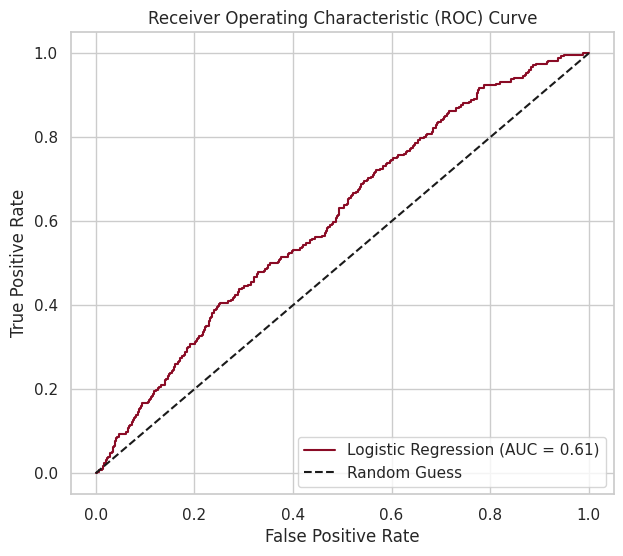

(0.6054200182775953,
 0.9605714285714285,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [9]:
Test_model(X_train, y_train)

---
## <a id="3.5">[3.5] Recursive Feature Elimination with Cross-Validation</a>



RFE-CV combines the RFE algorithm with cross-validation to improve its robustness and prevent overfitting.

**Algorithm:**

1. **Split dataset:** Divide the dataset into k folds (e.g., 5 folds for 5-fold cross-validation).
2. **RFE on each fold:** For each fold, perform RFE on the training data while treating the corresponding validation fold as the test set.
3. **Feature selection:** Select the features that are consistently ranked highly across all folds.
4. **Final model:** Train the final model using the selected features on the entire dataset.

In [11]:
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring="roc_auc")

rfecv.fit(X_train, y_train)

In [235]:
selected_features = X_train.columns[rfecv.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['var15', 'ind_var5_0', 'ind_var5', 'ind_var30', 'ind_var39_0',
       'ind_var41_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var12_0',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42_0',
       'num_var42', 'num_meses_var5_ult3', 'num_op_var41_efect_ult1',
       'num_op_var39_efect_ult1'],
      dtype='object')


In [257]:
cv_results = pd.DataFrame(rfecv.cv_results_)
print('Max score: ',cv_results['mean_test_score'].max())
print('n_features: ',cv_results['mean_test_score'].idxmax())

Max score:  0.724958724534223
n_features:  18


In [248]:
rfecv.n_features_

19

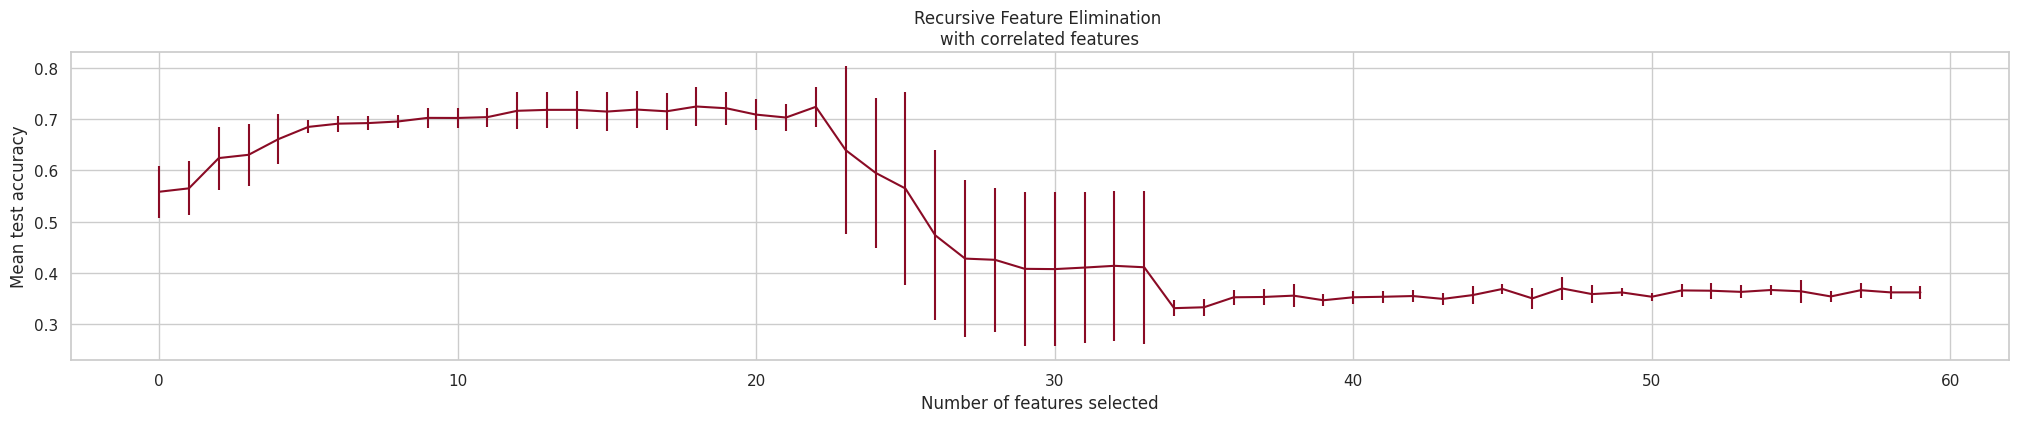

In [242]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results.index,
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

#### **Create Model with RFECV Method** 

In [ ]:
Test_model(X_train, y_train)


---
# <a id="2"><div style="text-align: center;">Embedded Methods</div></a>
---


Embedded feature selection methods are a powerful approach to selecting relevant features **during the model training process**. They combine the feature selection step with the model building process, making them efficient and often leading to improved performance. 

- Embedded methods can be explained with the help of following graphic:

<img src ="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png" width = 500>


**Image source** : AnalyticsVidhya

**1. Regularization Techniques:**

* **Lasso (L1 Regularization):** This technique adds a penalty to the model's loss function based on the absolute values of the coefficients. This encourages sparsity, meaning some coefficients are driven to zero, effectively eliminating those features.
* **Ridge (L2 Regularization):** Adds a penalty based on the squared values of the coefficients. It shrinks the coefficients towards zero but rarely makes them exactly zero. This helps with preventing overfitting, but doesn't directly select features.
* **Elastic Net:** Combines L1 and L2 regularization, providing a balance between feature selection and preventing overfitting. It can handle highly correlated features and select groups of related variables.

**2. Decision Tree-based Methods:**

* **Decision Tree Feature Importance:** Decision trees inherently rank features based on their ability to split data effectively.  Features used at higher levels in the tree are considered more important.
* **Random Forest Feature Importance:** Random forests aggregate the importance scores from multiple decision trees to provide a more robust measure of feature relevance.

**3. Other Techniques:**

* **Neural Network Pruning:** Specific methods like weight decay and dropout can be used to prune less relevant features during neural network training.



---
## <a id="3.1">[4.1] Lasso</a>


In [417]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # alpha controls the strength of regularization
lasso.fit(X_train, y_train)

# Lasso does not perform feature selection, but you can inspect coefficients
print("Ridge Coefficients:", lasso.coef_)

#### **Evaluate Lasso Model**

In [ ]:
measure_performance(y_test, lasso)

---
## <a id="4.2">[4.2] Ridge</a>


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)  # alpha controls the strength of regularization
ridge.fit(X_train, y_train)

# Ridge does not perform feature selection, but you can inspect coefficients
print("Ridge Coefficients:", ridge.coef_)

#### **Evaluate Ridge Model**

In [ ]:
measure_performance(y_test, ridge)

---
## <a id="4.3">[4.3] ElasticNet</a>


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01)  # alpha controls the strength of regularization
elastic_net.fit(X_train, y_train)

# Lasso does not perform feature selection, but you can inspect coefficients
print("Ridge Coefficients:", elastic_net.coef_)

#### **Evaluate ElasticNet Model**

In [ ]:
measure_performance(y_test, elastic_net)

---
## <a id="4.4">[4.4] RandomForest</a>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
selected_features = [data.feature_names[i] for i in range(len(importances)) if importances[i] > 0]
print("Selected Features (Random Forest):", selected_features)

#### **Evaluate RandomForest Model** 

In [ ]:
measure_performance(y_test, rf)

---
## <a id="4.5">[4.5] Summarizing embedded methods</a>



| Method | Description | Advantages | Disadvantages |
|---|---|---|---|
| Lasso | L1 regularization, enforces sparsity | Efficient, interpretable | Limited to linear models |
| Ridge | L2 regularization, shrinks coefficients | Prevents overfitting | Does not select features |
| Elastic Net | Combines L1 and L2, selects groups of features | Handles correlated features | More complex than Lasso |
| Decision Tree Feature Importance | Measures feature importance based on splits | Intuitive, interpretable | Can be sensitive to data structure |
| Random Forest Feature Importance | Aggregates importance from multiple trees | Robust, less sensitive to noise | More computationally expensive |
| GBM Feature Importance | Measures feature contribution to model performance | Powerful, accurate | Can be complex to interpret |


---
# <a id="5"><div style="text-align: center;">Resources</a> </div> 

---



- Scikit-Learn Documentation
- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection#4.-Embedded-Methods-

#### **Image Credits:** 
- https://www.researchgate.net/profile/Enis-Karaarslan/publication/337591149
- https://www.omnisci.com/technical-glossary/feature-selection